In [94]:
from pixell import enmap, utils, pointsrcs
from orphics import cosmology 

from astropy import units as u

import numpy as np

from matplotlib import pyplot as plt

import pickle as pk

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
ells = np.arange(6000)
cltt = cosmology.default_theory().lCl('TT',ells) 

In [96]:
shape,wcs = enmap.geometry(res=0.5*utils.arcmin, pos=(0,0), shape=(256,256), proj='tan')

path = '/scratch/r/rbond/jorlo/anomalies/sims/rand_CMB/'

#Random pure CMB
for i in range(1000):
    omap = enmap.rand_map(shape,wcs,cltt)
    omap.write(path + 'rand_{}.fits'.format(i))

In [92]:
answers = {}

for i in range(1000):
    omap = enmap.rand_map(shape,wcs,cltt)
    
    angle = np.random.uniform(0,360)*u.deg
    sep = np.random.uniform(0,1)*u.deg
    amp = np.random.uniform(10, 1000)
    ra, dec = (sep*np.cos(angle.to(u.radian).value)), (-sep*np.sin(angle.to(u.radian).value))
    
    sigma = np.random.uniform(1,20)*u.arcmin
    
    
    ps = pointsrcs.sim_srcs(shape, wcs, np.array([[dec.to(u.radian).value,ra.to(u.radian).value,amp]]),
                            sigma.value*utils.arcmin)
    omap += ps
    omap.write(path + 'ps_{}.fits'.format(i))
    
    answers[i] = {'pos':[ra, dec], 'amp':amp, 'sigma':sigma}

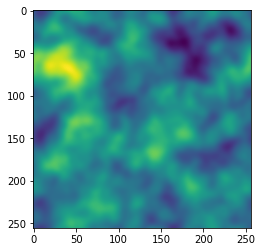

In [93]:
plt.imshow(omap)

In [95]:
with open(path+'answers.pk', 'wb') as f:
    pk.dump(answers, f)